In [7]:
import logging
from collections import Counter

import matplotlib.pyplot as plt
file = open("text.txt",'r',encoding="utf-8")
strings = list(file)

2370


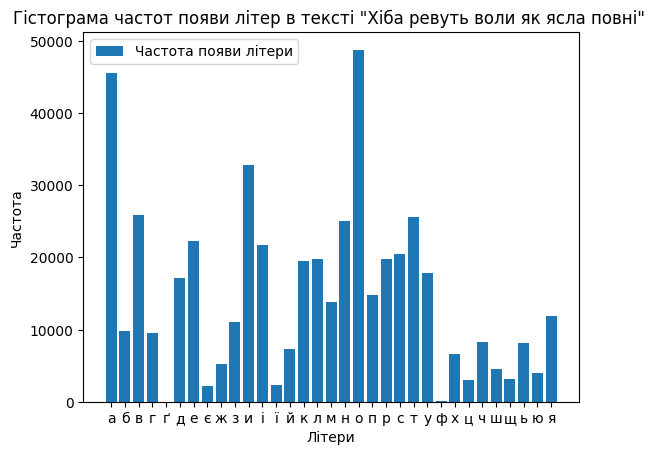

In [8]:
# Завдання Л1.1
import logging
plain_text = " ".join(strings)
letter_counts = Counter(filter(str.isalpha, plain_text.lower()))
dict_counter = dict(letter_counts)
def get_alphabet():
 return ['а', 'б', 'в', 'г',"ґ", 'д', 'е', 'є', 'ж', 'з', 'и', 'і', 'ї', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я']

ukrainian_alphabet_lowercase = ['а', 'б', 'в', 'г',"ґ", 'д', 'е', 'є', 'ж', 'з', 'и', 'і', 'ї', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я']
new_dict_letters = {}
for i in get_alphabet():
    try:
        new_dict_letters[i] = dict_counter[i]
    except  Exception :
        logging.warning(f"One of ukrainian letters wasn`t found in text :{i}")
        new_dict_letters[i] = 1
labels,values = zip(*new_dict_letters.items())
print(new_dict_letters.get("ї"))
indexes = range(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Літери')
plt.ylabel('Частота')
plt.title('Гiстограма частот появи лiтер в текстi "Хіба ревуть воли як ясла повні" ')
plt.legend(['Частота появи літери'])
plt.show()

In [9]:
# Завдання Л1.2

Alph="абвгґдеєжзиіїйклмнопрстуфхцчшщьюя"

plain_text = "".join(list(open("Апрель.txt","r",encoding="utf-8"))).lower().replace(" ","").replace("\n","")
key= "краса"
# Функція шифрування методом Віженера
def vigenere_encr(sk,pt,Alph):
    alph={Alph[i]:i for i in range(len(Alph))}
    alph_rec={i:Alph[i] for i in range(len(Alph))}
    ct=""
    for i in range(len(pt)):
        k=(alph[pt[i]]+alph[sk[i%len(sk)]])%len(Alph)
        ct+=alph_rec[k]
    return ct


# Функція дешифрування методом Віженера
def vigenere_decr(sk,ct,Alph):
    alph={Alph[i]:i for i in range(len(Alph))}
    alph_rec={i:Alph[i] for i in range(len(Alph))}
    pt=""
    for i in range(len(ct)):
        k=(alph[ct[i]]-alph[sk[i%len(sk)]])%len(Alph)
        pt+=alph_rec[k]
    return pt


ciphr_text = vigenere_encr(key,plain_text,Alph)
plain_text_decrypted = vigenere_decr(key,ciphr_text,Alph)
print(ciphr_text)

KeyError: ','

In [ ]:
print(plain_text_decrypted)

In [ ]:
class KeyGetter:
    def __init__(self,plain_text):
        self.plain_text = plain_text
        self.aplhabet = "абвгґдеєжзиіїйклмнопрстуфхцчшщьюя"
        self.cipherText = ""
        self.ciph_key = "групатік"
        self.cipherText_len = 0
        self.key_len = 0
        self.prob_lett = {}
        self.secret_key = ""
        self.ciph_text()
        self.prepare_text()
    def countIoC(self,txt):
        letterCounts = Counter(txt)
        F = 0
        for letter in letterCounts:
            F += letterCounts[letter] * (letterCounts[letter] - 1)
        N = len(txt)
        IoC = F / (N * (N - 1))
        return IoC
    def ciph_text(self):
        self.plain_text= self.plain_text[:200]
        print("Plain text: ",self.plain_text,"\n")
        self.cipherText = vigenere_encr(self.ciph_key,self.plain_text,self.aplhabet)
        print("Ciphered text: ",self.cipherText,"\n")
    def prepare_text(self):
        self.cipherText_len = len(self.cipherText)
        IoC_list = []
        for period in range(5, 21):
            period_list = []
            for i in range(period):
                substring = ""
                for j in range(i, self.cipherText_len, period):
                    substring += self.cipherText[j]
                period_list.append(substring)
            IoC_list.append([self.countIoC(i) for i in period_list])

        IoC_average = [sum(i) / len(i) for i in IoC_list]
        self.key_len = 5 + IoC_average.index(max(IoC_average))
        print("Довжина ключа:", self.key_len)
        count = Counter(self.plain_text)
        for i in self.aplhabet:
            if i not in count:
                count[i]=0.00001
        su=sum(count.values())
        self.prob_lett=[count[i]/su for i in self.aplhabet]
    def cesar_shyfr(self,txt, k):
        text=""
        for char_ in txt:
            if char_ in self.aplhabet:
                text+=self.aplhabet[(self.aplhabet.index(char_)-k)%len(self.aplhabet)]
            else:
                text+=char_
        return text

    def chi_sq(self,txt):
        letters_count=Counter(txt)
        all_letters = sum(dict(letters_count).values())
        cs = 0
        for i in self.aplhabet:
            cs += ((letters_count[i] -
                    all_letters*self.prob_lett[self.aplhabet.index(i)])
                   **2)/(all_letters*self.prob_lett[self.aplhabet.index(i)])
        return cs
    def get_key(self):
        for i in range(self.key_len):
            substring = ""
            for j in range(i, self.cipherText_len, self.key_len):
                substring += self.cipherText[j]
            all_chisq = []
            for k in range(len(self.aplhabet)):
                chisq = self.chi_sq(self.cesar_shyfr(substring, k))
                all_chisq.append(chisq)

            s = self.aplhabet[all_chisq.index(min(all_chisq))]
            self.secret_key += s
        print("Ключ :", self.secret_key)
        plainText = vigenere_decr(self.secret_key,self.cipherText,self.aplhabet)
        print("\n",plainText)

key_getter = KeyGetter(plain_text[:200])
key_getter.get_key()